In [1]:
import imageio
import numpy as np
import json
from matplotlib import pyplot as plt
from skimage.transform import warp
from scipy.ndimage import gaussian_filter
from scipy import ndimage
import math
import nibabel as nib

plt.rcParams["figure.figsize"] = (12,12)

In [2]:
width = 224
height = 224

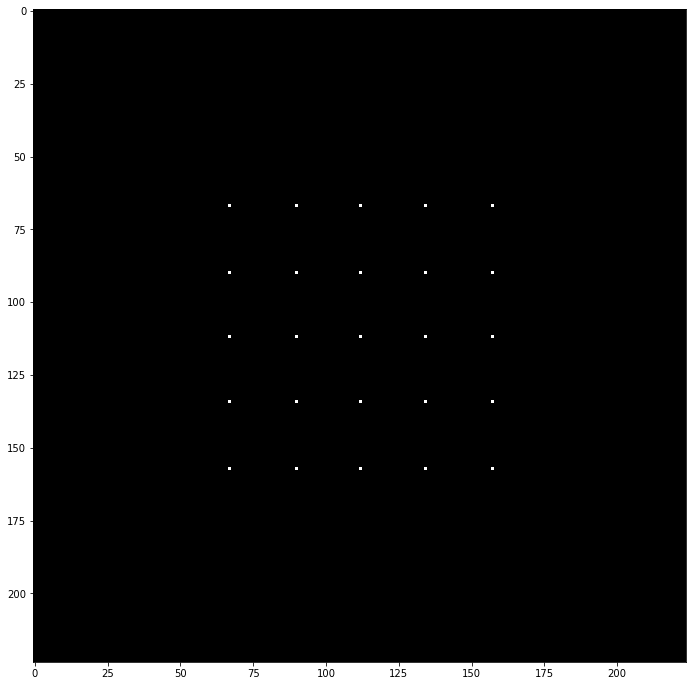

In [3]:
fixed = np.zeros((height, width))

n_x = 5
n_y = 5

spacing_x = (width / 2.0) / n_x
spacing_y = (height / 2.0) / n_y

base_offset_x = width / 4.0
base_offset_y = height / 4.0

offset_x = spacing_x / 2.0 + base_offset_x
offset_y = spacing_y / 2.0 + base_offset_y


index_2_xy = dict()
index = 0
for index_y in reversed(range(n_y)):
    y = int(round(offset_y + (spacing_y * index_y)))
    
    for index_x in range(n_x):
        x = int(round(offset_x + (spacing_x * index_x))) 
        
        fixed[y][x] = 1
        
        index_2_xy[index] = (x, y)
        index += 1

plt.imshow(fixed, cmap="gray")

json_file = json.dumps(index_2_xy)

f = open("fixed.json", "w")
f.write(json_file)
f.close()

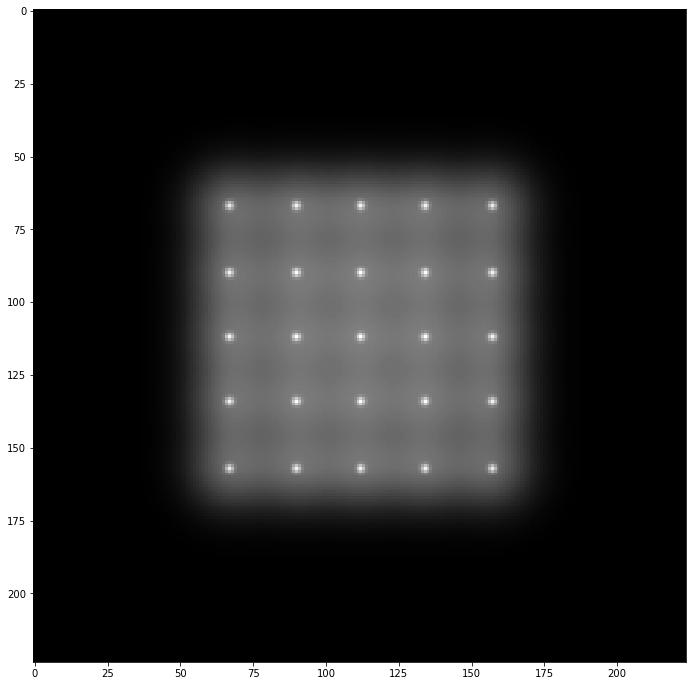

In [4]:
sigma = 1.0
sigma_back = 10

fixed_orig = fixed
fixed = gaussian_filter(fixed, sigma=sigma)
fixed_back = gaussian_filter(fixed, sigma=sigma_back)

fixed = (fixed / fixed.max()) * 255
fixed_back = (fixed_back / fixed_back.max()) * 255
fixed = 0.3 * fixed_orig + 0.3 * fixed + 0.3 * fixed_back

plt.imshow(fixed, cmap="gray")
plt.imsave("fixed.png", fixed, cmap="gray")

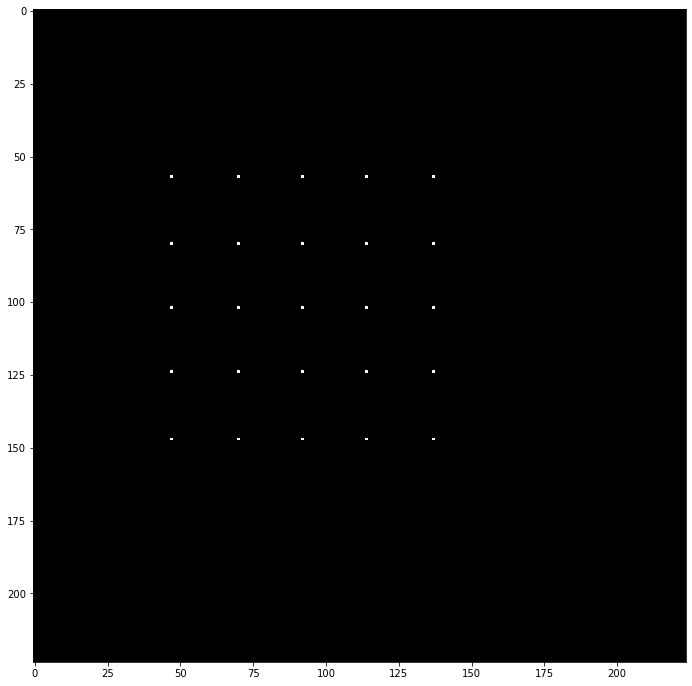

In [5]:
moving = np.zeros((height, width))

n_x = 5
n_y = 5

spacing_x = (width / 2.0) / n_x
spacing_y = (height / 2.0) / n_y

base_offset_x = width / 4.0 - 20
base_offset_y = height / 4.0 - 10

offset_x = spacing_x / 2.0 + base_offset_x
offset_y = spacing_y / 2.0 + base_offset_y

alpha = 0.05

index_2_xy = dict()
index = 0
for index_y in reversed(range(n_y)):
    y = int(round(offset_y + (spacing_y * index_y)))
    
    for index_x in range(n_x):
        x = int(round(offset_x + (spacing_x * index_x)))
        #y = y - int(round((math.sin((index_x / n_x) * 2* math.pi) * 5),0))
        
        #vec = np.array([x, y])
        #mat = np.array([[np.cos(alpha), -np.sin(alpha)],
        #                [np.sin(alpha), np.cos(alpha)]])
        
        #vec = np.dot(mat, vec)
        
        #x = int(round(vec[0]))
        #y = int(round(vec[1]))
        
        moving[y][x] = 1
        
        index_2_xy[index] = (x, y)
        index += 1

plt.imshow(moving, cmap="gray")

json_file = json.dumps(index_2_xy)

f = open("moving.json", "w")
f.write(json_file)
f.close() 

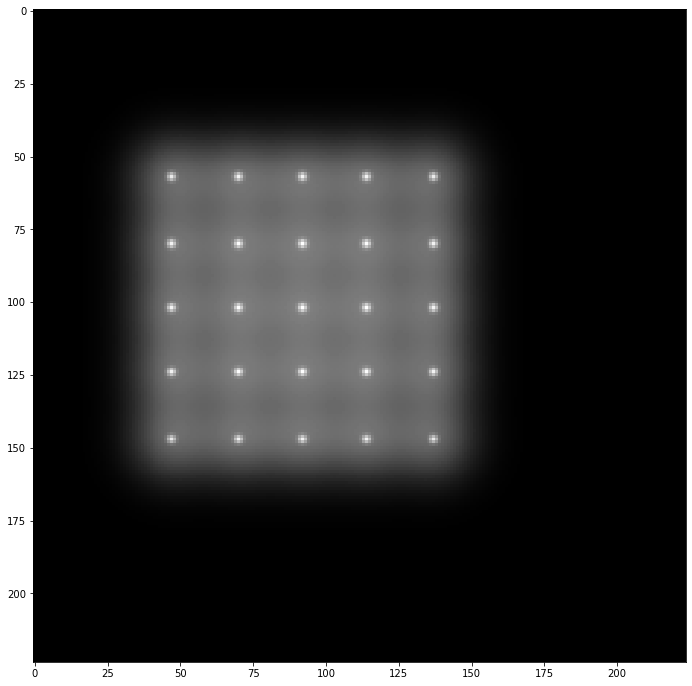

In [6]:
sigma = 1.0
sigma_back = 10

moving_orig = moving
moving = gaussian_filter(moving, sigma=sigma)
moving_back = gaussian_filter(moving, sigma=sigma_back)

moving = (moving / moving.max()) * 255
moving_back = (moving_back / moving_back.max()) * 255
moving = 0.3 * moving_orig + 0.3 * moving + 0.3 * moving_back

plt.imshow(moving, cmap="gray")
plt.imsave("moving.png", moving, cmap="gray")